<a href="https://colab.research.google.com/github/leoninekev/agents/blob/main/basics_llm_agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Define Agents
What are Agents?

<!-- Set up and serve an Ollama instance locally and try out few Opensource LLMs -->

### Setup dependencies

In [ ]:
!python -m pip install python-dotenv==1.0.1 llama-index==0.11.2 llama-index-llms-ollama==0.3.0 torch==2.4.0 transformers==4.42.4

*Check if the installed dependencies/versions are same as the ones in `pyproject.toml` file*

### Setup Ollama

**Go to the terminal and install ollama using**

`curl -fsSL https://ollama.com/install.sh | sh`
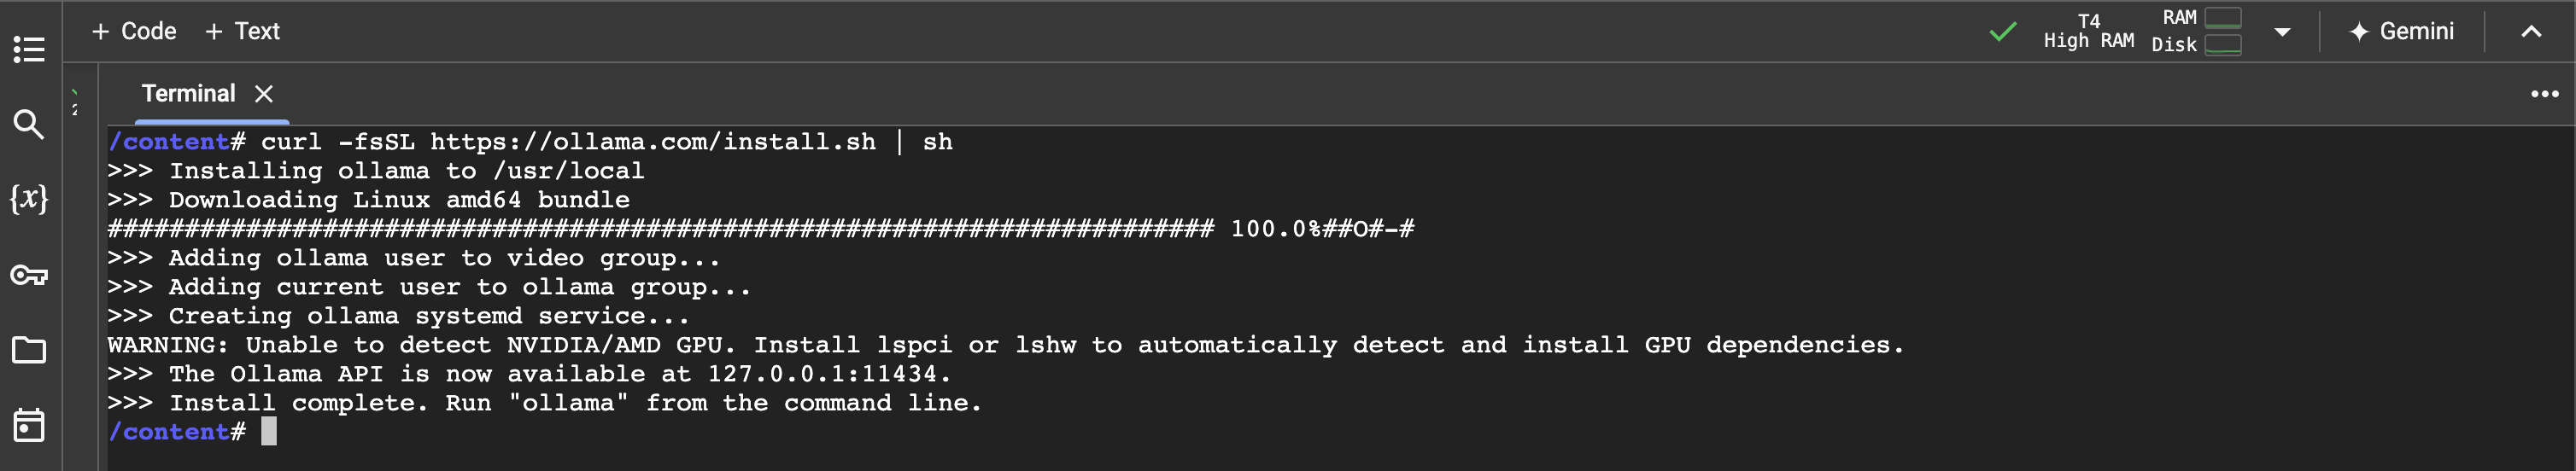



**Start Ollama from same terminal**

Use `ollama serve`
when you want to start ollama without running the desktop application.
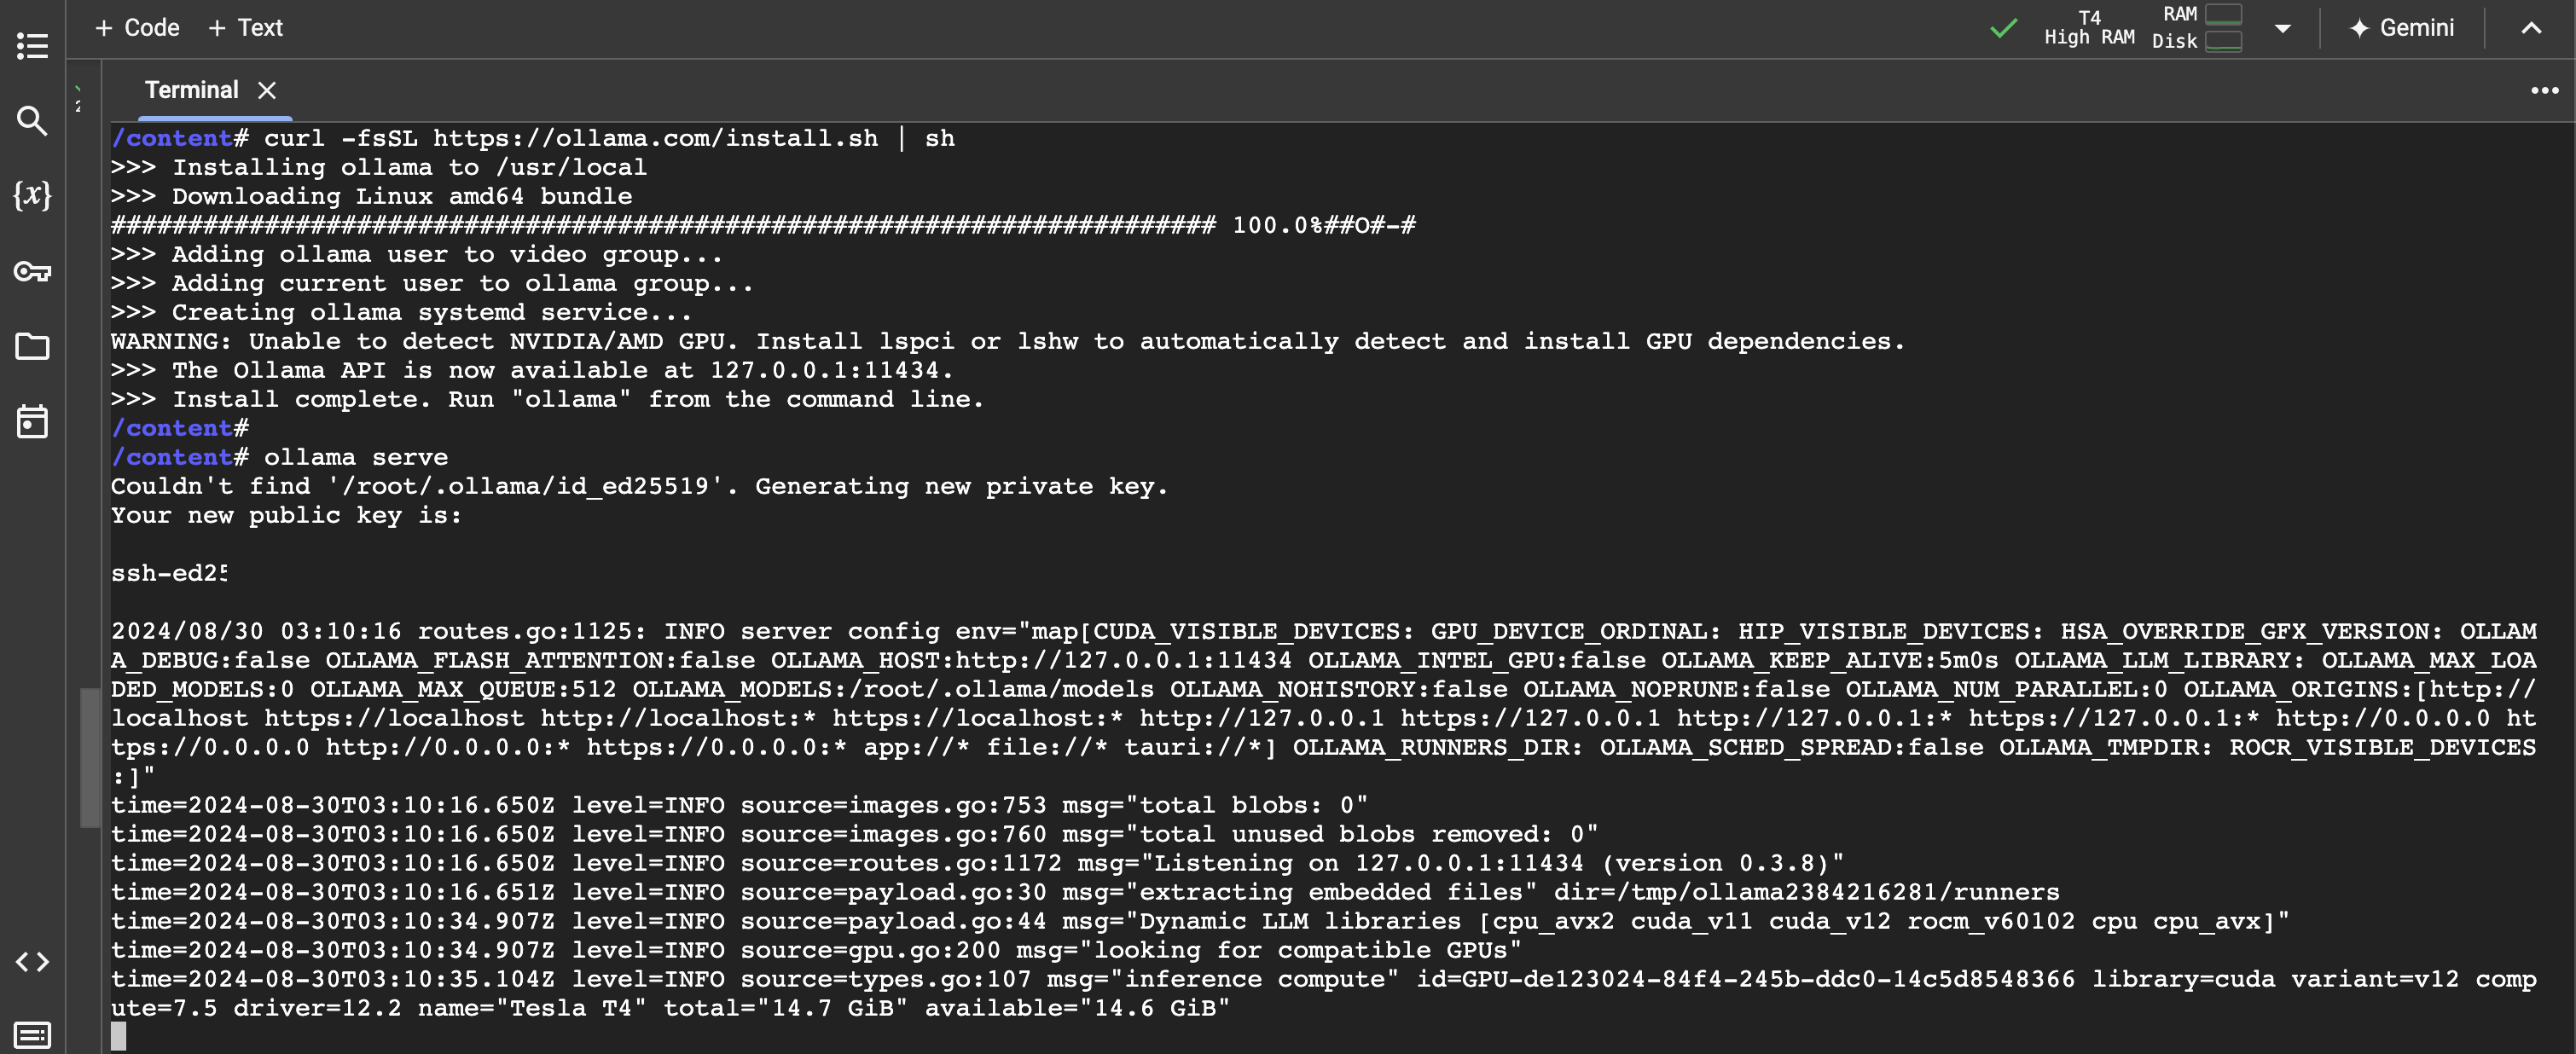


**Pull a model (gemma2, llama3.1, mistral, etc.) locally either in same terminal or here in one of the cells**

Example Models:

* `llama3.1:latest` (9B Parameters)
* `gemma2:2b` (2B Parameters)
* `gemma2` (9B Parameters)
* `gemma2:27b` (27B Parameters)
* `mistral` (9B Parameters)

In Terminal
```
ollama pull llama3.1
```

In Colab cell
```
!ollama pull llama3.1
```

In [ ]:
!ollama pull llama3.1
!ollama pull gemma2:2b

In [5]:
!ollama list

NAME           	ID          	SIZE  	MODIFIED       
gemma2:2b      	8ccf136fdd52	1.6 GB	30 seconds ago	
llama3.1:latest	f66fc8dc39ea	4.7 GB	58 seconds ago	


In [6]:
from llama_index.llms.ollama import Ollama
import spacy
from llama_index.core.agent import ReActAgent
from llama_index.llms.ollama import Ollama
from llama_index.core.tools import FunctionTool

In [8]:

# Load the small English model from spaCy
nlp = spacy.load("en_core_web_sm")

def count_tokens_spacy(text):
    doc = nlp(text)
    return len(doc)


def count(string: str) -> int:
  """Takes the text as input and returns the count of words or tokens in the input text"""
  return len(string.split(" "))

count_tool = FunctionTool.from_defaults(fn=count)


def multiply(a: float, b: float) -> float:
    """Multiply two numbers and returns the product"""
    return a * b

multiply_tool = FunctionTool.from_defaults(fn=multiply)

def add(a: float, b: float) -> float:
    """Add two numbers and returns the sum"""
    return a + b

add_tool = FunctionTool.from_defaults(fn=add)

In [12]:
count_tokens_spacy(out)

481

In [10]:
count(out)

322

### Try Basic prompting (No Agents & Tools involved)

**You may try using this example prompt:**

*What is 300+(15*9)? Use a tool to calculate and explain every step.*

What is (14)300+(15 times 9)*12 times 11 and adding 17 to overall output? Use a tool to calculate and explain every step

In [7]:
prompt = input("Enter a prompt: ")
print(f"Prompt: {prompt}")

Enter a prompt: What is (14)300+(15 times 9)*12 times 11 and adding 17 to overall output? Use a tool to calculate and explain every step
Prompt: What is (14)300+(15 times 9)*12 times 11 and adding 17 to overall output? Use a tool to calculate and explain every step


In [ ]:
prompt= "What is the capital of Arizona? What is there to see in its Capital, Which is the closest and farthest city to the capital, what is the usual climate there and what is the best time to travel to its capital? Answer in "


### Local Llama 3.1 (8 Billion paramters)

Meta Llama 3, a family of models developed by Meta Inc. are available between 8B to 70B parameter sizes.

[read more](https://ollama.com/library/llama3:8b)


In [ ]:
!ollama show llama3.1:latest

  Model                                          
  	arch            	llama 	                         
  	parameters      	8.0B  	                         
  	quantization    	Q4_0  	                         
  	context length  	131072	                         
  	embedding length	4096  	                         
  	                                               
  Parameters                                     
  	stop	"<|start_header_id|>"	                      
  	stop	"<|end_header_id|>"  	                      
  	stop	"<|eot_id|>"         	                      
  	                                               
  License                                        
  	LLAMA 3.1 COMMUNITY LICENSE AGREEMENT        	  
  	Llama 3.1 Version Release Date: July 23, 2024	  
  	                                               


In [ ]:
llama3 = Ollama(model="llama3.1:latest", request_timeout=60.0)
resp = llama3.complete(prompt)
print(f"Prompt: {prompt}\n{'--'*60}\n{'--'*60}\nCompletion: {resp}")

Prompt: What is (14)300+(15*9)*12 times 11 offset by 17? Use a tool to calculate and explain every step
------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
Completion: I'll use a calculator tool to evaluate the expression. Here are the steps:

**Expression:** `(14)(300)+(15*9)*12 × 11 - 17`

**Step 1: Multiply 14 and 300**

`14 × 300 = 4200`

So, the expression becomes: `4200 + (15 * 9) * 12 × 11 - 17`

**Step 2: Calculate the multiplication of 15 and 9**

`15 × 9 = 135`

Now, the expression is: `4200 + 135 * 12 × 11 - 17`

**Step 3: Multiply 135 by 12**

`135 × 12 = 1620`

The expression now becomes: `4200 + 1620 × 11 - 17`

**Step 4: Multiply 1620 by 11**

`1620 × 11 = 17820`

So, the expression is now: `4200 + 17820 - 17`

**Step 5: Add 4200 and 17820**

`4200 + 17820 = 22720`

Now, the expressio

### Local Gemma 2 (2 Billion paramters)

Gemma 2 model by Google is available in three sizes - 2B, 9B and 27B parameters.

[read more](https://ollama.com/library/gemma2)

In [ ]:
!ollama show gemma2:2b

  Model                             
  	arch            	gemma2	            
  	parameters      	2.6B  	            
  	quantization    	Q4_0  	            
  	context length  	8192  	            
  	embedding length	2304  	            
  	                                  
  Parameters                        
  	stop	"<start_of_turn>"	             
  	stop	"<end_of_turn>"  	             
  	                                  
  License                           
  	Gemma Terms of Use              	  
  	Last modified: February 21, 2024	  
  	                                  


In [ ]:
gemma_2b = Ollama(model="gemma2:2b", request_timeout=60.0)
resp = gemma_2b.complete(prompt)
print(f"Prompt: {prompt}\n{'--'*60}\n{'--'*60}\nCompletion: {resp}")

__________________________________________________________________________________________________________

#### Use the following instruction to run the llm-agents code as standalone `.py` script from terminal


Install [poetry](https://python-poetry.org/) (A python package for dependency management) using
```
pip install poetry
```
pull the `pyproject.toml` file from the repo or download manually into the current working directory using `wget`

Create a virtual environment **'local agent using llama 3'** and Install the dependencies from `pyproject.toml` file using :  

`poetry install`

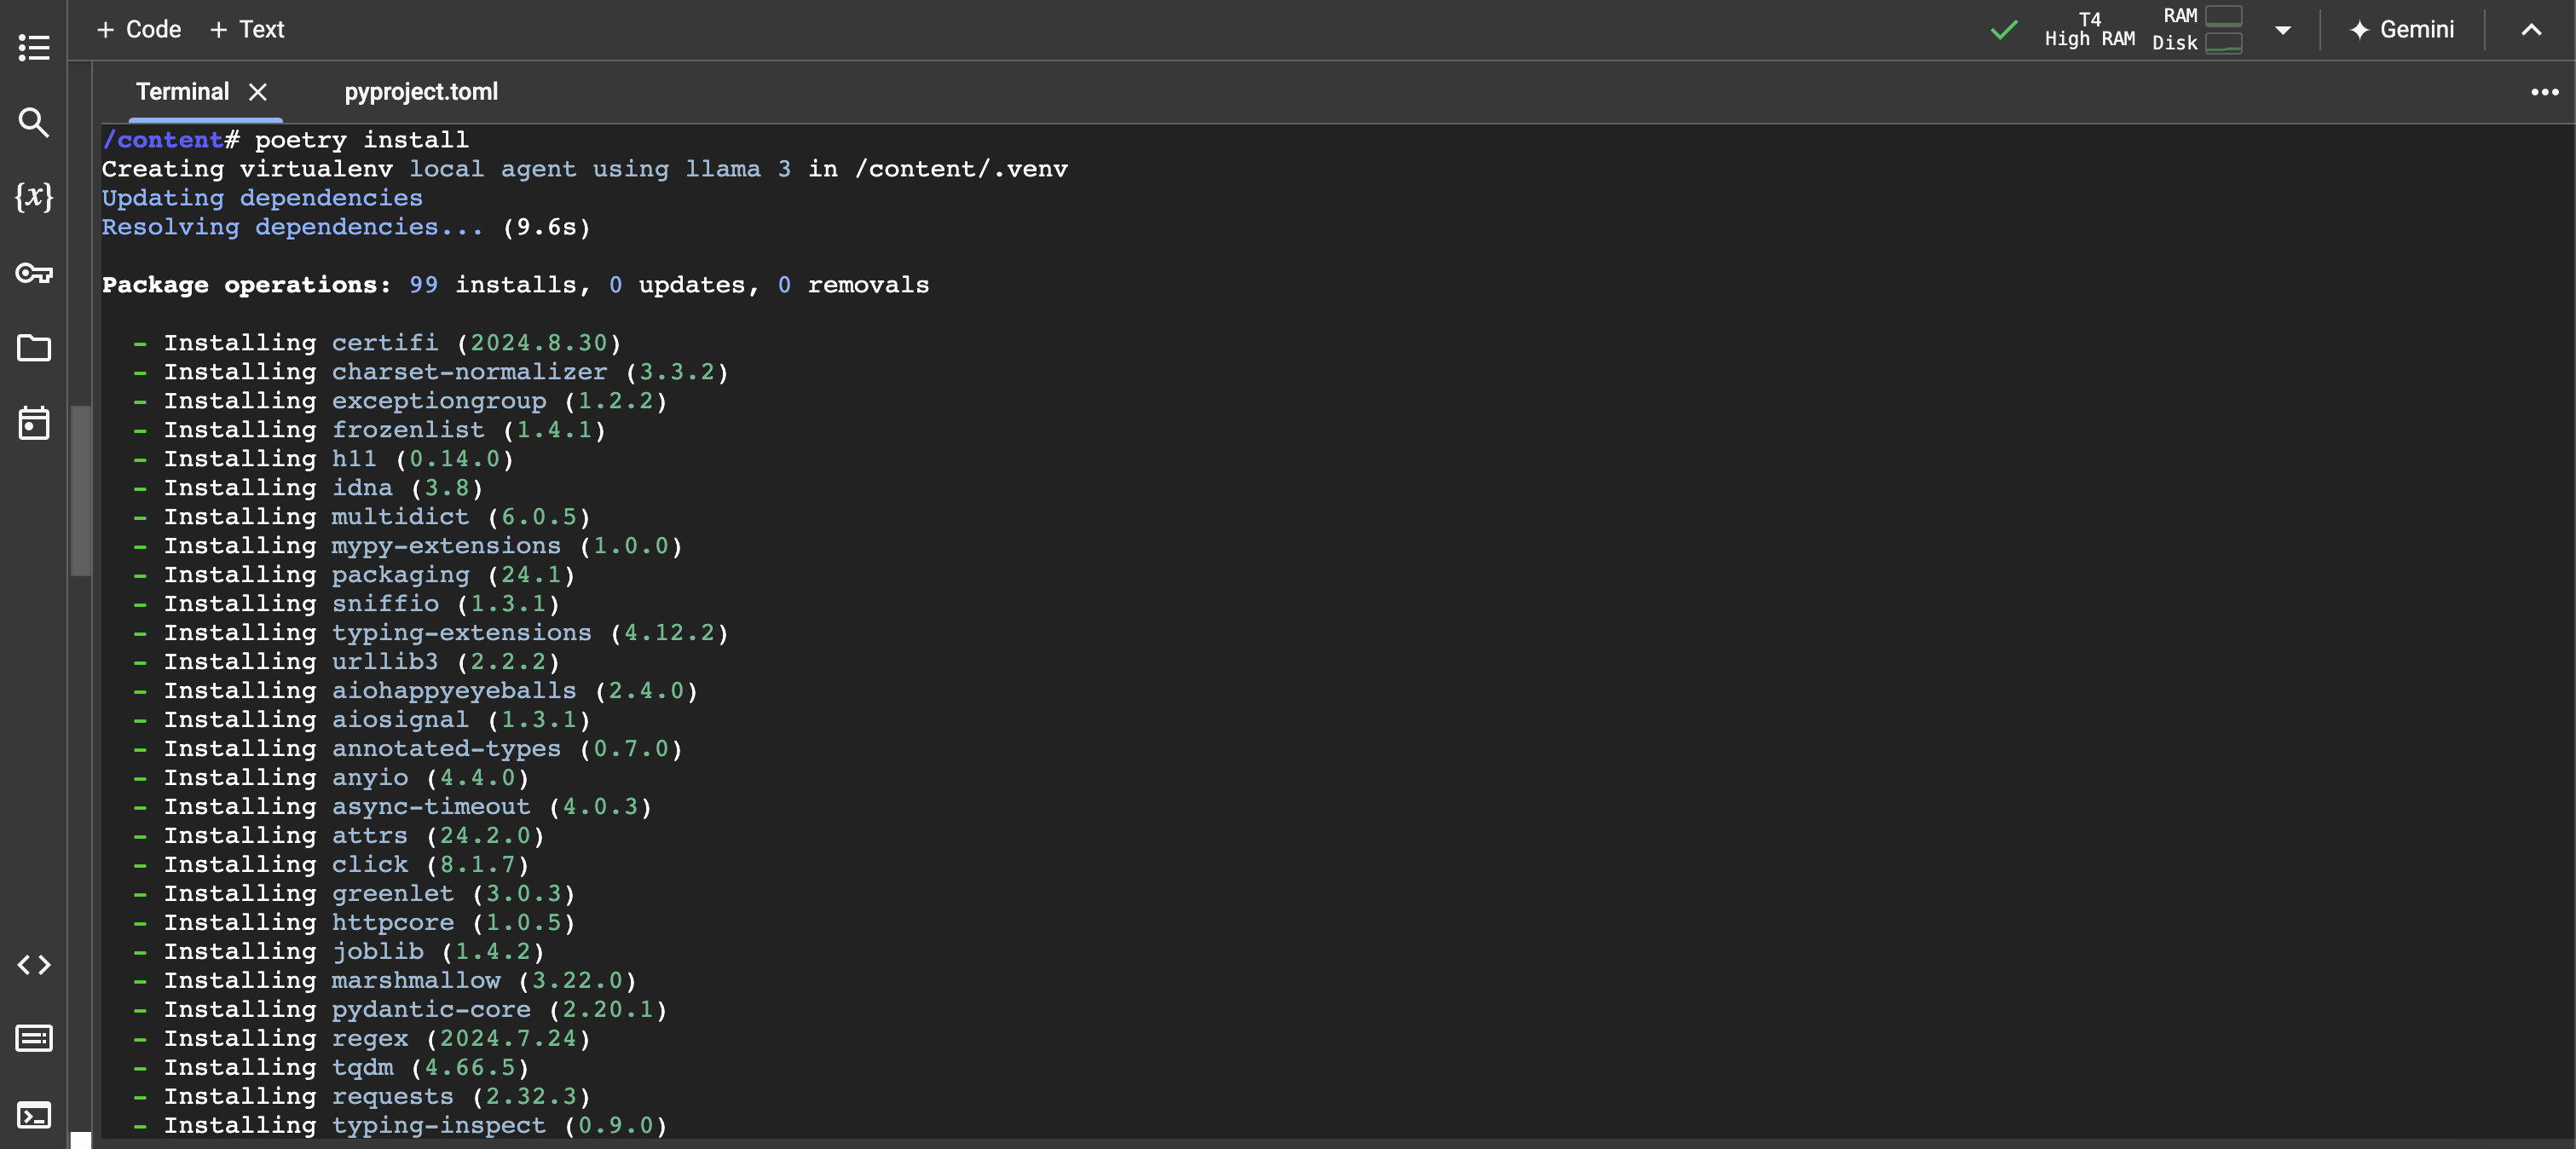


Initiate shell to activate the virtual environment **'local agent using llama 3'** using :


`poetry shell`

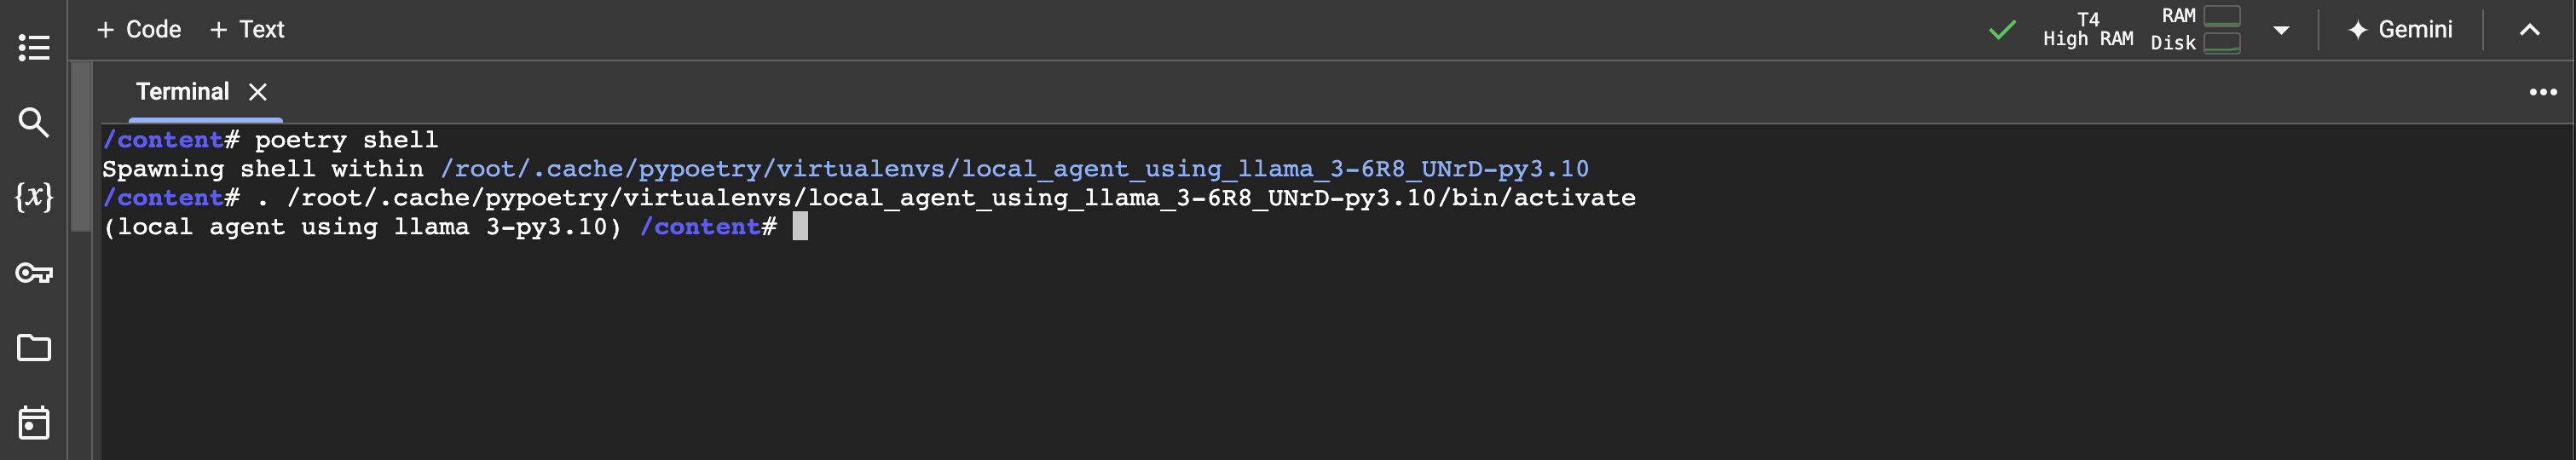